In [1]:
import pandas as pd

In [2]:
data_per_sekcja = pd.read_csv("./dane_podzial_na_sektory.csv", encoding="latin1", sep=';')

In [3]:
data_per_sekcja.head()

,Kod,Nazwa,Sekcje wg PKD 2007,Rok,Wartosc,Jednostka miary,Atrybut
0,0,POLSKA,Sekcja B,2011,0,etat,x
1,0,POLSKA,Sekcja D,2011,0,etat,x
2,0,POLSKA,Sekcja E,2011,0,etat,x
3,0,POLSKA,Sekcja S,2006,87629,etat,
4,0,POLSKA,Sekcja S,2005,89825,etat,


In [4]:
data_per_sekcja['Sekcje wg PKD 2007'].value_counts()

Sekcje wg PKD 2007
Sekcja B           19
Sekcja M           19
Sekcja: B+C+D+E    19
Sekcja C           19
Sekcja G           19
Sekcja P           19
Sekcja Q           19
Sekcja O           19
Sekcja F           19
Sekcja H           19
Sekcja N           19
Sekcja D           19
Sekcja K           19
Sekcja J           19
Sekcja I           19
Sekcja A           19
Sekcja L           19
Sekcja R           19
Sekcja S           19
Sekcja E           19
og¸em             19
Name: count, dtype: int64

In [5]:
mapping = {
    "og¸em": "Ogółem",
    "Sekcja A": "Rolnictwo, leśnictwo, łowiectwo i rybactwo",
    "Sekcja B": "Górnictwo i wydobywanie",
    "Sekcja C": "Przetwórstwo przemysłowe",
    "Sekcja D": "Wytwarzanie i zaopatrywanie w energię elektryczną, gaz, parę wodną i gorącą wodę",
    "Sekcja E": "Dostawa wody; gospodarowanie ściekami i odpadami, rekultywacja",
    "Sekcja F": "Budownictwo",
    "Sekcja G": "Handel; naprawa pojazdów samochodowych",
    "Sekcja H": "Transport i gospodarka magazynowa",
    "Sekcja I": "Zakwaterowanie i gastronomia",
    "Sekcja J": "Informacja i komunikacja",
    "Sekcja K": "Działalność finansowa i ubezpieczeniowa",
    "Sekcja L": "Obsługa rynku nieruchomości",
    "Sekcja M": "Działalność profesjonalna, naukowa i techniczna",
    "Sekcja N": "Administracja i działalność wspierająca",
    "Sekcja O": "Administracja publiczna i obrona narodowa; obowiązkowe zabezpieczenia społeczne",
    "Sekcja P": "Edukacja",
    "Sekcja Q": "Opieka zdrowotna i pomoc społeczna",
    "Sekcja R": "Działalność związana z kulturą, rozrywką i rekreacją",
    "Sekcja S": "Pozostała działalność usługowa",
    "Sekcja B+C+D+E": "Przemysł i budownictwo",
}
data_per_sekcja["Sekcje wg PKD 2007"] = data_per_sekcja["Sekcje wg PKD 2007"].replace(mapping)

In [6]:
data_per_sekcja['Sekcje wg PKD 2007'].value_counts()

Sekcje wg PKD 2007
Górnictwo i wydobywanie                                                             19
Działalność profesjonalna, naukowa i techniczna                                     19
Sekcja: B+C+D+E                                                                     19
Przetwórstwo przemysłowe                                                            19
Handel; naprawa pojazdów samochodowych                                              19
Edukacja                                                                            19
Opieka zdrowotna i pomoc społeczna                                                  19
Administracja publiczna i obrona narodowa; obowiązkowe zabezpieczenia społeczne     19
Budownictwo                                                                         19
Transport i gospodarka magazynowa                                                   19
Administracja i działalność wspierająca                                             19
Wytwarzanie i zaopatrywa

In [7]:
# Resetowanie indeksu, aby unikalnie identyfikować wiersze
data_per_sekcja = data_per_sekcja.reset_index(drop=True)

# Konwersja kolumny 'Wartosc' na liczbę
data_per_sekcja["Wartosc"] = pd.to_numeric(data_per_sekcja["Wartosc"], errors="coerce")

# Sortowanie danych według sekcji i lat
data_per_sekcja = data_per_sekcja.sort_values(by=["Sekcje wg PKD 2007", "Rok"])

# Grupowanie danych według sekcji i obliczanie zmian procentowych
data_per_sekcja["Zmiana procentowa"] = (
    data_per_sekcja.groupby("Sekcje wg PKD 2007")["Wartosc"].pct_change() * 100
)

/var/folders/l_/1ptk4w3s00d9dh4qb8jv2tp00000gn/T/ipykernel_38932/2394326716.py:12: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_per_sekcja.groupby("Sekcje wg PKD 2007")["Wartosc"].pct_change() * 100


In [8]:
data_per_sekcja

,Kod,Nazwa,Sekcje wg PKD 2007,Rok,Wartosc,Jednostka miary,Atrybut,Zmiana procentowa
130,0,POLSKA,Administracja i działalność wspierająca,2005,262885.0,etat,,NaN
138,0,POLSKA,Administracja i działalność wspierająca,2006,277158.0,etat,,5.429370
150,0,POLSKA,Administracja i działalność wspierająca,2007,297357.0,etat,,7.287901
153,0,POLSKA,Administracja i działalność wspierająca,2008,320033.0,etat,,7.625850
154,0,POLSKA,Administracja i działalność wspierająca,2009,320795.0,etat,,0.238100
...,...,...,...,...,...,...,...,...
118,0,POLSKA,Zakwaterowanie i gastronomia,2019,208257.0,etat,,6.430050
111,0,POLSKA,Zakwaterowanie i gastronomia,2020,195539.0,etat,,-6.106878
115,0,POLSKA,Zakwaterowanie i gastronomia,2021,198693.0,etat,,1.612977
119,0,POLSKA,Zakwaterowanie i gastronomia,2022,215877.0,etat,,8.648518


In [9]:
filtered_data = data_per_sekcja.dropna(subset=["Zmiana procentowa"])

# Znalezienie wierszy z największymi zmianami
largest_changes = filtered_data.sort_values(by="Zmiana procentowa", ascending=False)

# Wyświetlenie 10 sektorów z największymi zmianami
print("Największe zmiany procentowe:")
largest_changes.head(10)

Największe zmiany procentowe:


,Kod,Nazwa,Sekcje wg PKD 2007,Rok,Wartosc,Jednostka miary,Atrybut,Zmiana procentowa
34,0,POLSKA,Pozostała działalność usługowa,2013,130803.0,etat,,27.865920
108,0,POLSKA,Informacja i komunikacja,2008,189626.0,etat,,14.173380
91,0,POLSKA,"Rolnictwo, leśnictwo, łowiectwo i rybactwo",2020,165162.0,etat,,13.829465
205,0,POLSKA,Budownictwo,2007,615064.0,etat,,12.458564
104,0,POLSKA,Zakwaterowanie i gastronomia,2008,182345.0,etat,,12.191595
159,0,POLSKA,Informacja i komunikacja,2022,346334.0,etat,,10.778669
161,0,POLSKA,Administracja i działalność wspierająca,2010,353781.0,etat,,10.282579
9,0,POLSKA,Pozostała działalność usługowa,2008,102088.0,etat,,10.092851
172,0,POLSKA,Administracja i działalność wspierająca,2016,440918.0,etat,,9.714118
200,0,POLSKA,Transport i gospodarka magazynowa,2008,602380.0,etat,,9.367738


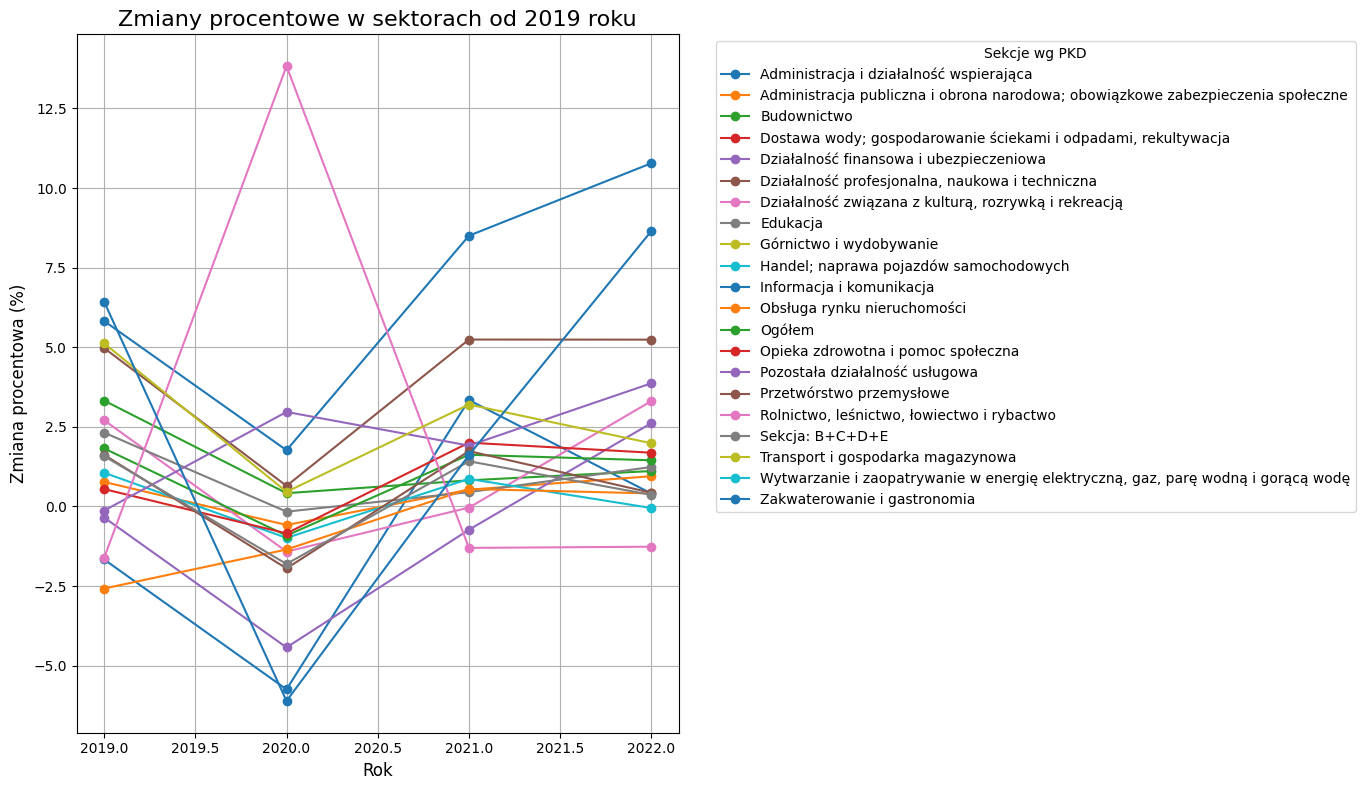

In [10]:
# Filtracja danych tylko dla lat od 2019 roku
filtered_data_since_2019 = data_per_sekcja[(data_per_sekcja["Rok"] >= 2019) & (data_per_sekcja["Rok"] <= 2022)]

# Grupowanie danych według sekcji i lat, wyciągnięcie średnich zmian procentowych
changes_since_2019 = (
    filtered_data_since_2019
    .groupby(["Sekcje wg PKD 2007", "Rok"])["Zmiana procentowa"]
    .mean()
    .unstack(level=0)  # Rozbicie lat jako indeksu poziomu 0
)

# Tworzenie wykresu liniowego zmian w czasie
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for column in changes_since_2019.columns:
    plt.plot(changes_since_2019.index, changes_since_2019[column], marker="o", label=column)

# Tytuł i etykiety osi
plt.title("Zmiany procentowe w sektorach od 2019 roku", fontsize=16)
plt.xlabel("Rok", fontsize=12)
plt.ylabel("Zmiana procentowa (%)", fontsize=12)
plt.legend(title="Sekcje wg PKD", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()


NameError: name 'MultipleLocator' is not defined

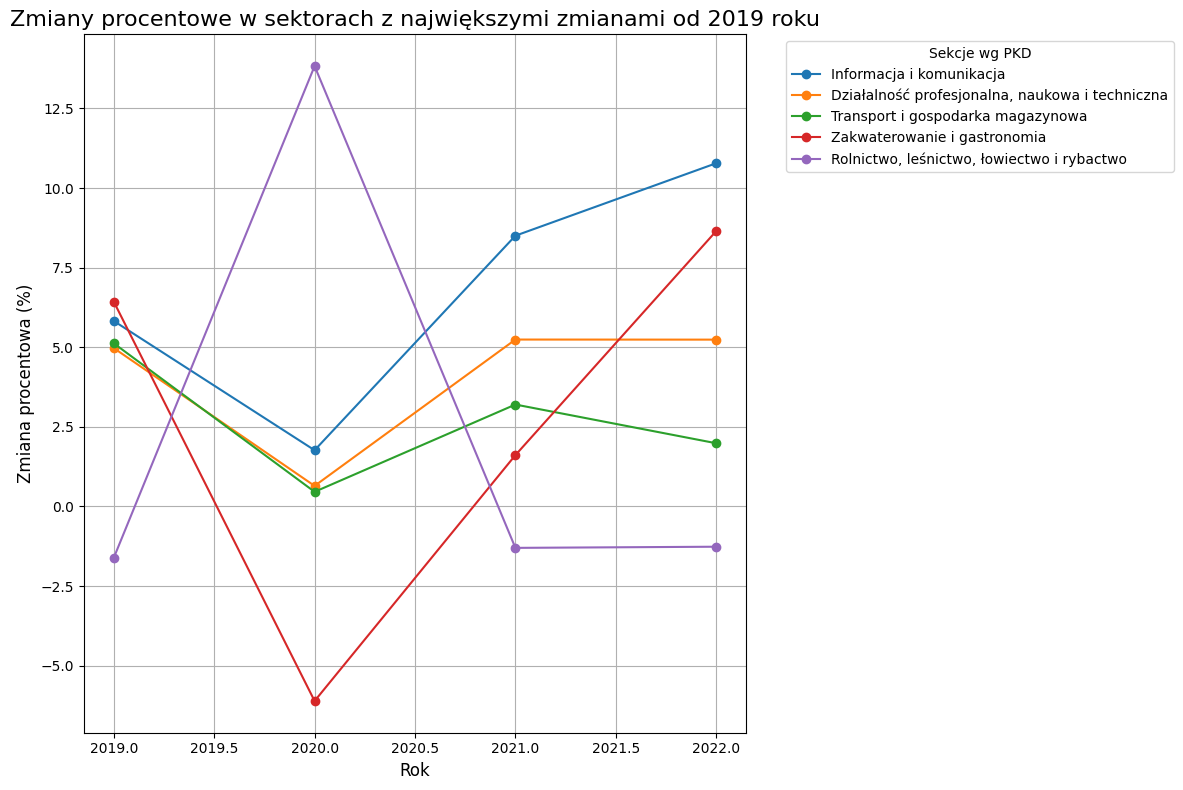

In [11]:
# Filtracja danych tylko dla lat od 2019 roku
filtered_data_since_2019 = data_per_sekcja[(data_per_sekcja["Rok"] >= 2019) & (data_per_sekcja["Rok"] <= 2022)]

# Obliczenie średnich zmian procentowych dla każdego sektora
mean_changes = (
    filtered_data_since_2019
    .groupby("Sekcje wg PKD 2007")["Zmiana procentowa"]
    .mean()
    .sort_values(ascending=False)  # Sortowanie od największej zmiany
)

# Wybór sektorów z największymi średnimi zmianami (np. top 5 sektorów)
top_sectors_names = mean_changes.head(5).index  # Nazwy sektorów z top 5

# Filtracja danych tylko dla wybranych sektorów
top_sectors_data = filtered_data_since_2019[filtered_data_since_2019["Sekcje wg PKD 2007"].isin(top_sectors_names)]

# Tworzenie wykresu dla wybranych sektorów
plt.figure(figsize=(12, 8))
for sector in top_sectors_names:
    sector_data = top_sectors_data[top_sectors_data["Sekcje wg PKD 2007"] == sector]
    plt.plot(sector_data["Rok"], sector_data["Zmiana procentowa"], marker="o", label=sector)

# Tytuł i etykiety
plt.title("Zmiany procentowe w sektorach z największymi zmianami od 2019 roku", fontsize=16)
plt.xlabel("Rok", fontsize=12)
plt.ylabel("Zmiana procentowa (%)", fontsize=12)
plt.legend(title="Sekcje wg PKD", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()

# Ustawienie bardziej szczegółowych podziałek osi X (np. co 1 rok lub co 0.5 roku)
ax = plt.gca()  # Pobranie bieżącej osi
ax.xaxis.set_major_locator(MultipleLocator(1))  # Główne podziałki co 1 rok
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
# Wyświetlenie wykresu
plt.show()

# Wyświetlenie wykresu
plt.show()


Wzrost statystyk w KRUS

Jednak w 2020 roku nastąpił nagły wzrost dynamiki zatrudnienia na wsi. W Kasach Rolniczego Ubezpieczenia Społecznego z kwartału na kwartał notowano kolejne wzrosty rejestracji osób, które rozpoczęły lub wróciły do płacenia składek na ubezpieczenie społeczne, zdrowotne i emerytalno-rentowe. Łącznie w całym 2020 roku zarejestrowało się w KRUS o 100 tys. osób więcej niż w całym 2019 roku. Zazwyczaj wzrost zatrudnienia w rolnictwie jest sezonowy: w II i III kwartale pracowników jest więcej, a w I i IV kwartale znacznie mniej. W ubiegłym roku trend był inny.
Pandemia ściągnęła ludzi na wieś

Powodem takich zmian była pandemia covid-19, która w wielu zakładach pracy spowodowała perturbacje i zwolnienia. Osoby, które straciły pracę na etacie i miały możliwość powrotu na KRUS skorzystały z tego. Dotyczy to głównie rolników tzw. dwuzawodowców, czyli posiadających gospodarstwa rolne, ale zatrudnionych na umowie o pracę, gdzie pracodawca opłacał za nich składki na ZUS, ale także małżonków rolników pracujących na etatach, a teraz powracających do KRUS na ubezpieczenie jako współmałżonek rolnika. Wiadomo też, że w KRUS rolnicy zaczęli także ubezpieczać domowników, najczęściej dzieci studiujące w mieście i pracujące by utrzymać się na studiach. Gdy przez lockdown zamknięto cały sektor usług gastronomicznych wiele takich osób zostało z dnia na dzień bez pracy.


Wzrost liczby osób zarejestrowanych w Kasie Rolniczego Ubezpieczenia Społecznego (KRUS) w 2020 roku o około 100 tys. osób mógł wynikać z kilku czynników:

1. Pandemia COVID-19  
Powrót do gospodarstw rolnych: W obliczu pandemii COVID-19 wiele osób wróciło na wieś z miast, gdzie wcześniej pracowało, np. w sektorze usługowym lub przemysłowym. Często były to osoby z rodzin rolniczych, które zdecydowały się na powrót do pracy w gospodarstwach rolnych.
Niepewność zatrudnienia w innych sektorach: Kryzys gospodarczy wywołany pandemią skłonił część osób do wyboru bardziej stabilnej pracy w sektorze rolnym, zwłaszcza w gospodarstwach rodzinnych.
<br><br>
2. Korzyści z ubezpieczenia w KRUS  
Niższe składki niż w ZUS: W KRUS składki są znacznie niższe niż w Zakładzie Ubezpieczeń Społecznych (ZUS), co czyni je bardziej atrakcyjnymi dla osób, które mają formalną możliwość rejestracji jako rolnicy.
Dodatkowe korzyści socjalne: Ubezpieczenie w KRUS daje dostęp do świadczeń socjalnych, takich jak emerytury rolnicze, renty rodzinne czy zasiłki chorobowe. W czasie pandemii, kiedy wiele osób doświadczało trudności ekonomicznych, rejestracja w KRUS mogła stanowić formę zabezpieczenia.  
<br><br>
3. Formalizacja pracy w rolnictwie  
W 2020 roku część pracy w rolnictwie mogła zostać sformalizowana, aby umożliwić korzystanie z programów wsparcia rządowego lub unijnych dotacji dla gospodarstw rolnych.
Wymóg posiadania ubezpieczenia w KRUS mógł być warunkiem koniecznym do otrzymania takich świadczeń, co mogło zwiększyć liczbę rejestracji. 
<br><br>
4. Dopłaty i wsparcie rządowe  
Programy wspierające rolników: W związku z pandemią uruchomiono dodatkowe mechanizmy wsparcia finansowego, w tym tarcze antykryzysowe, z których mogły korzystać osoby ubezpieczone w KRUS.
Płatności obszarowe i środki unijne: Rolnicy rejestrujący się w KRUS mogli liczyć na dodatkowe korzyści związane z dostępem do unijnych dopłat bezpośrednich.  
<br><br>
5. Zmiany demograficzne i sytuacja na rynku pracy  
Starzenie się społeczeństwa rolniczego: Wzrost liczby ubezpieczonych mógł być częściowo wynikiem nowych rejestracji młodszych członków rodzin rolniczych, którzy zaczęli przejmować obowiązki związane z prowadzeniem gospodarstw.
Ograniczenia w migracji zarobkowej: Pandemia spowodowała zmniejszenie możliwości migracji zarobkowej do innych krajów, np. Niemiec czy Wielkiej Brytanii, co skłoniło część osób do poszukiwania pracy w Polsce, w tym w sektorze rolniczym.  
<br><br>
6. Przepisy i regulacje  
Możliwe, że w 2020 roku wprowadzono dodatkowe regulacje lub zmiany w zasadach dotyczących rejestracji w KRUS, które ułatwiły lub zachęciły więcej osób do ubezpieczenia.
Podsumowanie
Wzrost liczby osób zarejestrowanych w KRUS w 2020 roku wynikał z kombinacji czynników: pandemii COVID-19, atrakcyjności ubezpieczenia w KRUS w porównaniu z ZUS, formalizacji pracy w rolnictwie oraz wsparcia rządowego i unijnego. Był to efekt zarówno zmian ekonomicznych, jak i polityki wspierającej rolników w trudnym czasie pandemii.

In [12]:
dane_miasto_wies = pd.read_csv("./dane_miasto_wies_bezrobocie.csv", encoding="utf-8", sep=';')

In [13]:
dane_miasto_wies

,Kod,Nazwa,Miejsce zamieszkania / zameldowania,Wartość i precyzja,Rok,Wartosc,Jednostka miary,Atrybut
0,0,POLSKA,ogółem,wartość liczbowa,2010,"10,0",%,
1,0,POLSKA,ogółem,wskaźnik precyzji,2010,"1,4",%,
2,0,POLSKA,miasta,wartość liczbowa,2010,"9,9",%,
3,0,POLSKA,miasta,wskaźnik precyzji,2010,"2,1",%,
4,0,POLSKA,wieś,wartość liczbowa,2010,"10,1",%,
...,...,...,...,...,...,...,...,...
79,0,POLSKA,ogółem,wskaźnik precyzji,2023,"5,1",%,
80,0,POLSKA,miasta,wartość liczbowa,2023,"2,7",%,
81,0,POLSKA,miasta,wskaźnik precyzji,2023,"8,0",%,
82,0,POLSKA,wieś,wartość liczbowa,2023,"2,9",%,


In [14]:
dane_miasto_wies = dane_miasto_wies[dane_miasto_wies["Wartość i precyzja"] != 'wskaźnik precyzji']

In [15]:
print(dane_miasto_wies["Wartosc"].dtypes)  # Powinno zwrócić: float64 lub int64
print(dane_miasto_wies["Wartosc"].isnull().sum())  # Sprawdzenie brakujących wartości (jeśli jakieś dane są błędne)


object
0


In [16]:
print(dane_miasto_wies["Wartosc"].unique())


['10,0' '9,9' '10,1' '9,7' '10,4' '11,1' '10,6' '10,2' '11,2' '9,2' '8,7'
 '7,7' '7,2' '8,4' '6,3' '5,9' '6,8' '4,9' '4,6' '5,4' '3,9' '3,6' '4,4'
 '3,3' '3,2' '3,4' '3,1' '2,9' '2,7' '2,8']


In [17]:
# Konwersja kolumny Wartosc do typu numerycznego
# Usunięcie spacji i innych niepożądanych znaków
dane_miasto_wies["Wartosc"] = dane_miasto_wies["Wartosc"].str.replace(" ", "").str.replace(",", ".")
dane_miasto_wies["Wartosc"] = pd.to_numeric(dane_miasto_wies["Wartosc"], errors="coerce")


/var/folders/l_/1ptk4w3s00d9dh4qb8jv2tp00000gn/T/ipykernel_38932/3412672936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane_miasto_wies["Wartosc"] = dane_miasto_wies["Wartosc"].str.replace(" ", "").str.replace(",", ".")
/var/folders/l_/1ptk4w3s00d9dh4qb8jv2tp00000gn/T/ipykernel_38932/3412672936.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane_miasto_wies["Wartosc"] = pd.to_numeric(dane_miasto_wies["Wartosc"], errors="coerce")


In [18]:
dane_miasto_wies

,Kod,Nazwa,Miejsce zamieszkania / zameldowania,Wartość i precyzja,Rok,Wartosc,Jednostka miary,Atrybut
0,0,POLSKA,ogółem,wartość liczbowa,2010,10.0,%,
2,0,POLSKA,miasta,wartość liczbowa,2010,9.9,%,
4,0,POLSKA,wieś,wartość liczbowa,2010,10.1,%,
6,0,POLSKA,ogółem,wartość liczbowa,2011,9.9,%,
8,0,POLSKA,miasta,wartość liczbowa,2011,9.7,%,
10,0,POLSKA,wieś,wartość liczbowa,2011,10.4,%,
12,0,POLSKA,ogółem,wartość liczbowa,2012,10.4,%,
14,0,POLSKA,miasta,wartość liczbowa,2012,10.0,%,
16,0,POLSKA,wieś,wartość liczbowa,2012,11.1,%,
18,0,POLSKA,ogółem,wartość liczbowa,2013,10.6,%,


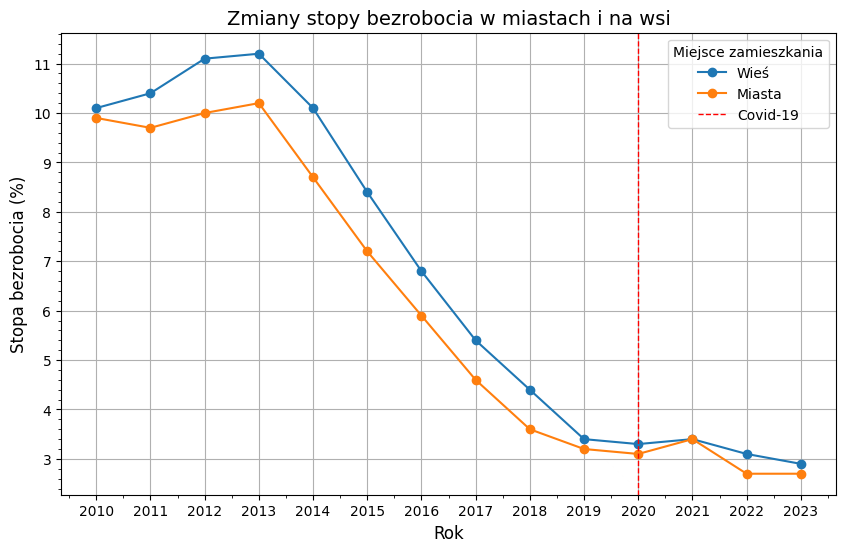

In [19]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Filtracja danych dla wsi i miast
data_village = dane_miasto_wies[dane_miasto_wies["Miejsce zamieszkania / zameldowania"] == "wieś"]
data_city = dane_miasto_wies[dane_miasto_wies["Miejsce zamieszkania / zameldowania"] == "miasta"]

# Rysowanie wykresu
plt.figure(figsize=(10, 6))

# Wykres dla wsi
plt.plot(data_village["Rok"], data_village["Wartosc"], label="Wieś", marker="o", linestyle="-")

# Wykres dla miast
plt.plot(data_city["Rok"], data_city["Wartosc"], label="Miasta", marker="o", linestyle="-")

plt.axvline(x = 2020, color="red", linestyle="--", linewidth=1, label="Covid-19")

# Dodanie etykiet i tytułu
plt.title("Zmiany stopy bezrobocia w miastach i na wsi", fontsize=14)
plt.xlabel("Rok", fontsize=12)
plt.ylabel("Stopa bezrobocia (%)", fontsize=12)
ax = plt.gca()  # Pobranie bieżącej osi
ax.xaxis.set_major_locator(MultipleLocator(1))  # Główne podziałki co 1 rok
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(1))  # Główne podziałki co 0.5
ax.yaxis.set_minor_locator(MultipleLocator(0.2)) # Pomocnicze podziałki co 0.1
plt.grid() 
# Dodanie legendy
plt.legend(title="Miejsce zamieszkania", fontsize=10)

ax.yaxis.set

# Wyświetlenie wykresu
plt.show()


In [20]:
dane_miasto_wies["Rok"].dtype

dtype('int64')

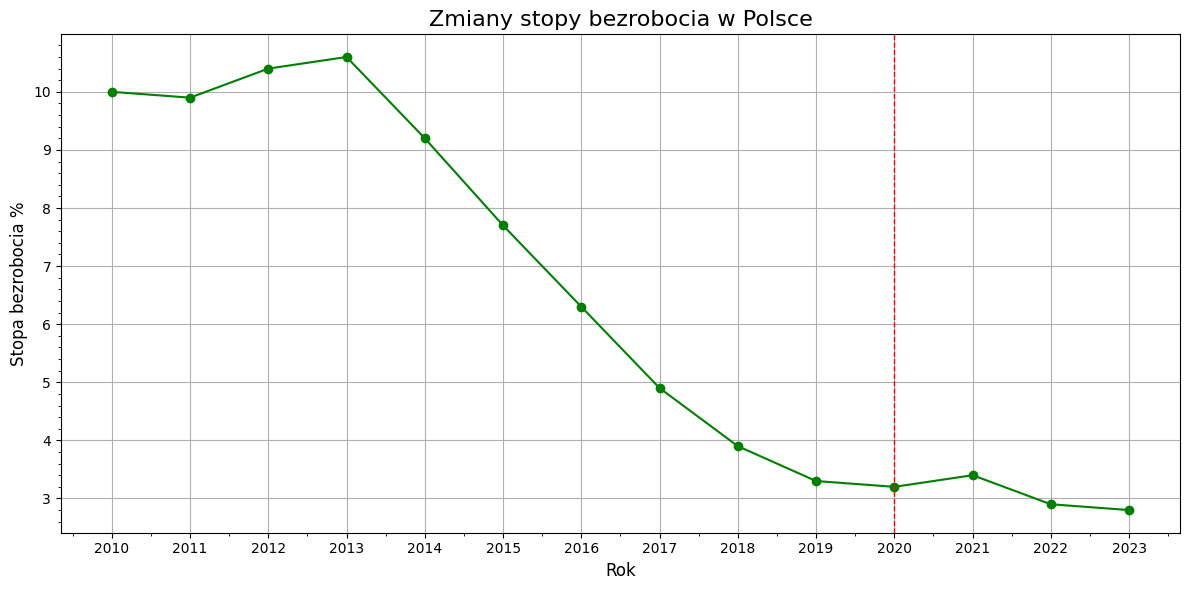

In [21]:
import matplotlib.pyplot as plt

# Filtracja danych dla wsi i miast
data = dane_miasto_wies[dane_miasto_wies["Miejsce zamieszkania / zameldowania"] == "ogółem"]

plt.figure(figsize=(12, 6))

# Wykres dla wsi
plt.plot(data["Rok"], data["Wartosc"], marker="o", color='green')
plt.axvline(x = 2020, color="red", linestyle="--", linewidth=1, label="Covid-19")

# Dostosowanie osi i etykiet
plt.title("Zmiany stopy bezrobocia w Polsce", fontsize=16)
plt.xlabel("Rok", fontsize=12)
plt.ylabel("Stopa bezrobocia %", fontsize=12)
plt.grid(True)

plt.tight_layout()

from matplotlib.ticker import MultipleLocator

# Ustawienie bardziej szczegółowych podziałek osi X (np. co 1 rok lub co 0.5 roku)
ax = plt.gca()  # Pobranie bieżącej osi
ax.xaxis.set_major_locator(MultipleLocator(1))  # Główne podziałki co 1 rok
ax.xaxis.set_minor_locator(MultipleLocator(0.5)) # Automatyczne ustawienie zakresu
ax.yaxis.set_major_locator(MultipleLocator(1))  # Główne podziałki co 0.5
ax.yaxis.set_minor_locator(MultipleLocator(0.2))

# Wyświetlenie wykresu
plt.show()

1. Wysoka stopa bezrobocia w 2013 roku
W 2013 roku stopa bezrobocia była stosunkowo wysoka z powodu:
a) Kryzys finansowy 2008–2009 i jego skutki  
Kryzys finansowy wpłynął na gospodarkę światową i europejską, co spowodowało spowolnienie gospodarcze w Polsce.
Sektor przemysłowy oraz budownictwo odczuły spadek popytu, co przełożyło się na redukcję zatrudnienia.  
b) Efekty sezonowe  
Bezrobocie na początku lat 2010–2013 w Polsce było również wynikiem ograniczonego popytu na pracowników sezonowych w budownictwie i rolnictwie w miesiącach zimowych.  
c) Strukturalne problemy rynku pracy  
Wysoka liczba osób długotrwale bezrobotnych.
Niedostosowanie kompetencji pracowników do wymagań rynku pracy.  
<br>
2. Spadek stopy bezrobocia po 2013 roku  
Począwszy od 2014 roku, bezrobocie zaczęło znacząco spadać, głównie dzięki:
a) Silny wzrost gospodarczy  
Polska gospodarka zaczęła się dynamicznie rozwijać po kryzysie.
Wzrost PKB w latach 2014–2019 wynosił średnio ok. 4% rocznie, co generowało nowe miejsca pracy.  
b) Fundusze unijne  
Dzięki wsparciu z Unii Europejskiej powstały nowe inwestycje infrastrukturalne i przedsiębiorstwa.
Fundusze unijne wspierały programy aktywizacji zawodowej.  
c) Migracja zarobkowa  
Znaczna liczba Polaków wyemigrowała do krajów UE (np. Wielkiej Brytanii, Niemiec), co zmniejszyło podaż pracy w Polsce.
Dodatkowo, przyjazd pracowników z Ukrainy uzupełnił luki w sektorach niskopłatnych.  
d) Polityka rynku pracy  
Wprowadzono programy wsparcia dla osób bezrobotnych, w tym szkolenia zawodowe oraz dopłaty do zatrudnienia.
Wzrost płacy minimalnej wpłynął na poprawę jakości pracy i motywację do podejmowania zatrudnienia.  
e) Rozwój nowych sektorów  
Rozwój technologii i e-commerce stworzył nowe miejsca pracy w branżach takich jak IT, logistyka czy handel internetowy.  
<br>
3. Stopa bezrobocia w 2020 roku i później  
W 2020 roku pandemia COVID-19 wywołała chwilowy wzrost bezrobocia w sektorach takich jak turystyka, gastronomia i transport.
Jednak szybkie działania rządu (np. tarcze antykryzysowe) oraz rozwój pracy zdalnej pomogły ustabilizować sytuację.
Podsumowanie
Duża stopa bezrobocia w 2013 roku była efektem wcześniejszych problemów gospodarczych i strukturalnych, które były łagodzone przez rozwój gospodarki, wsparcie unijne i zmiany demograficzne. Spadek stopy bezrobocia od 2014 roku świadczy o poprawie sytuacji gospodarczej Polski i lepszym dopasowaniu rynku pracy do potrzeb gospodarki.

1. Przyczyny globalnego kryzysu finansowego
Kryzys finansowy rozpoczął się w Stanach Zjednoczonych i szybko rozprzestrzenił się na cały świat. Kluczowe przyczyny to:  
a) Kryzys na rynku nieruchomości w USA  
Nadmierna ilość kredytów hipotecznych udzielanych osobom o niskiej zdolności kredytowej (tzw. subprime mortgages).
Wzrost wartości nieruchomości w latach 2000–2007 spowodował "bańkę spekulacyjną".
Kiedy ceny nieruchomości zaczęły spadać, wielu kredytobiorców nie było w stanie spłacać kredytów, co doprowadziło do niewypłacalności banków i instytucji finansowych.  
b) Upadek banków i instytucji finansowych  
Upadek dużych instytucji, takich jak Lehman Brothers, wstrząsnął globalnym systemem finansowym.
Pojawiła się utrata zaufania na rynkach finansowych, co doprowadziło do ograniczenia dostępności kredytów (tzw. credit crunch).  
c) Efekt domina w gospodarce globalnej  
Problemy na rynku finansowym przeniosły się na sektor przedsiębiorstw, co spowodowało spadek inwestycji i wzrost bezrobocia.
Handel międzynarodowy znacznie zwolnił, co wpłynęło na kraje zależne od eksportu.  
2. Wpływ kryzysu na Polskę  
Polska, choć stosunkowo dobrze poradziła sobie z kryzysem w porównaniu do innych krajów UE, odczuła jego efekty.  
a) Spowolnienie wzrostu gospodarczego  
Polska była jedynym krajem w UE, który uniknął recesji w latach 2008–2009. Wzrost PKB w 2009 roku wyniósł 1,6% (dla porównania: średnia UE to -4,5%).
Jednak spadek popytu na polski eksport w Europie Zachodniej ograniczył rozwój sektora przemysłowego i budownictwa.  
b) Wzrost bezrobocia  
Chociaż Polska uniknęła masowych zwolnień, wzrost bezrobocia był widoczny w sektorach takich jak budownictwo, przemysł i transport.
W 2013 roku bezrobocie osiągnęło 10,4%, co było efektem długotrwałego spowolnienia gospodarczego.  
c) Spadek inwestycji zagranicznych  
Kryzys spowodował, że zagraniczni inwestorzy zaczęli ograniczać swoje zaangażowanie w Europie Środkowo-Wschodniej, w tym w Polsce.
Projekty infrastrukturalne i inwestycje w nowe miejsca pracy zostały opóźnione lub wstrzymane.  
d) Problemy z zadłużeniem w UE  
Kryzys wywołał problemy z zadłużeniem w krajach strefy euro (np. Grecja, Hiszpania, Włochy), co pośrednio wpłynęło na polską gospodarkę przez osłabienie wspólnego rynku.  
3. Dlaczego Polska poradziła sobie lepiej niż inne kraje?  
a) Silny sektor bankowy  
Polski sektor bankowy był mniej narażony na ryzyko związane z toksycznymi aktywami (np. subprime mortgages).
Surowe regulacje i konserwatywna polityka kredytowa ograniczyły wpływ kryzysu na banki w Polsce.  
b) Stabilność gospodarcza  
Duży rynek wewnętrzny oraz relatywnie niski poziom zadłużenia publicznego sprawiły, że Polska była mniej podatna na skutki kryzysu.  
c) Wsparcie ze środków unijnych  
Polska korzystała z funduszy UE na rozwój infrastruktury i programy wsparcia dla przedsiębiorstw.  
d) Elastyczny rynek pracy  
Wprowadzenie elastycznych form zatrudnienia (np. umowy cywilnoprawne) pozwoliło firmom na dostosowanie się do trudnych warunków bez masowych zwolnień.  
4. Jak wpłynęło to na spadek bezrobocia po 2013 roku?  
Poprawa sytuacji w UE: Odbudowa gospodarki w Europie Zachodniej zwiększyła popyt na polski eksport.
Rozwój nowych sektorów: Rozwój technologii, IT i e-commerce stworzył nowe miejsca pracy.
Demografia: Migracja Polaków na Zachód zmniejszyła presję na rynek pracy.


Spadek stopy bezrobocia w Polsce po 2013 roku był najszybszy ze względu na kombinację krajowych i globalnych czynników, które sprzyjały dynamicznemu wzrostowi gospodarczemu oraz poprawie sytuacji na rynku pracy. Oto szczegółowe wyjaśnienie:  

1. Dynamiczny wzrost gospodarczy w Polsce  
a) Ożywienie gospodarki po kryzysie finansowym  
Po okresie spowolnienia (2008–2013) gospodarka Polski zaczęła rosnąć w szybkim tempie.
W latach 2014–2019 średnie tempo wzrostu PKB wynosiło ok. 4% rocznie, co było jednym z najwyższych w Europie.
Silny popyt wewnętrzny (wydatki konsumpcyjne) oraz eksport były kluczowymi motorami wzrostu.  
b) Rozwój sektora eksportowego  
Polska stała się jednym z głównych dostawców produktów przemysłowych i rolno-spożywczych dla Europy Zachodniej.
Wzrost eksportu w takich sektorach, jak motoryzacja, elektronika i AGD, stworzył tysiące nowych miejsc pracy.  
c) Fundusze unijne  
W latach 2014–2020 Polska była największym beneficjentem funduszy unijnych w UE.  
Środki te były inwestowane w rozwój infrastruktury, innowacje i programy wsparcia dla przedsiębiorstw, co przyczyniło się do tworzenia nowych miejsc pracy.  
2. Polityka rynku pracy  
a) Wsparcie zatrudnienia  
Programy aktywizacji zawodowej, finansowane zarówno ze środków krajowych, jak i unijnych, pomogły zmniejszyć liczbę osób długotrwale bezrobotnych.
Wprowadzenie subsydiów dla firm zatrudniających młodych pracowników oraz dopłaty do staży i szkoleń zwiększyły szanse na zatrudnienie.  
b) Wzrost płacy minimalnej  
Wzrost płacy minimalnej spowodował wzrost atrakcyjności pracy w sektorach niskopłatnych, takich jak handel, budownictwo i usługi.
Wyższe wynagrodzenia zwiększyły także motywację do podejmowania pracy.  
c) Elastyczność rynku pracy  
Rozwój umów cywilnoprawnych (np. umowy zlecenie) pozwolił przedsiębiorstwom na szybkie dostosowanie się do zmieniającej się sytuacji gospodarczej.
Choć krytykowane za brak stabilności, te formy zatrudnienia pomogły zwiększyć zatrudnienie.  
3. Migracja zarobkowa  
a) Emigracja Polaków  
Po wejściu Polski do UE w 2004 roku miliony Polaków wyemigrowały do krajów Europy Zachodniej w poszukiwaniu lepiej płatnej pracy.
W latach 2013–2019 proces ten trwał, co zmniejszyło presję na krajowy rynek pracy.  
b) Imigracja pracowników z Ukrainy  
Od 2014 roku Polska stała się jednym z głównych kierunków migracji zarobkowej dla Ukraińców.
Pracownicy z Ukrainy wypełnili luki na rynku pracy, szczególnie w sektorach takich jak rolnictwo, budownictwo i przemysł.  
4. Rozwój nowych sektorów gospodarki  
a) Technologia i cyfryzacja  
Rozwój sektora IT i usług nowoczesnych (np. centra usług wspólnych) stworzył wiele miejsc pracy.
Polska stała się regionalnym hubem dla firm technologicznych, przyciągając inwestorów zagranicznych.  
b) E-commerce i logistyka  
Wzrost popularności zakupów online napędził rozwój sektora e-commerce, co stworzyło zapotrzebowanie na pracowników w logistyce, magazynach i dostawach.  
c) Ożywienie budownictwa  
Inwestycje w infrastrukturę oraz rynek mieszkaniowy zwiększyły zatrudnienie w sektorze budowlanym.  
5. Poprawa koniunktury w UE  
Ożywienie gospodarcze w Europie Zachodniej zwiększyło popyt na polski eksport, co bezpośrednio wpłynęło na rozwój polskiego przemysłu.
Wzrost inwestycji zagranicznych w Polsce (np. budowa fabryk, centrów logistycznych) stworzył nowe miejsca pracy.  
6. Zmiany demograficzne  
a) Starzenie się społeczeństwa  
Spadek liczby osób w wieku produkcyjnym (ze względu na starzenie się społeczeństwa) zmniejszył podaż pracy, co pozytywnie wpłynęło na wskaźnik zatrudnienia.
Mniejsza liczba osób aktywnych zawodowo automatycznie obniżała wskaźnik bezrobocia.  
7. Wzrost znaczenia elastycznych form pracy  
Elastyczne formy zatrudnienia (np. praca zdalna, gig economy) po 2013 roku zaczęły się dynamicznie rozwijać, co pozwoliło na zatrudnienie większej liczby osób w różnych formach współpracy.



In [22]:
data

,Kod,Nazwa,Miejsce zamieszkania / zameldowania,Wartość i precyzja,Rok,Wartosc,Jednostka miary,Atrybut
0,0,POLSKA,ogółem,wartość liczbowa,2010,10.0,%,
6,0,POLSKA,ogółem,wartość liczbowa,2011,9.9,%,
12,0,POLSKA,ogółem,wartość liczbowa,2012,10.4,%,
18,0,POLSKA,ogółem,wartość liczbowa,2013,10.6,%,
24,0,POLSKA,ogółem,wartość liczbowa,2014,9.2,%,
30,0,POLSKA,ogółem,wartość liczbowa,2015,7.7,%,
36,0,POLSKA,ogółem,wartość liczbowa,2016,6.3,%,
42,0,POLSKA,ogółem,wartość liczbowa,2017,4.9,%,
48,0,POLSKA,ogółem,wartość liczbowa,2018,3.9,%,
54,0,POLSKA,ogółem,wartość liczbowa,2019,3.3,%,


In [24]:
dane_kwartal = pd.read_csv("./dane_kwartalne_bezrobocie.csv",encoding="utf-8", sep=';')

In [25]:
dane_kwartal = dane_kwartal[dane_kwartal["Wartość i precyzja"] != "wskaźnik precyzji"]

In [26]:
dane_kwartal

,Kod,Nazwa,Okresy,Płeć,Wartość i precyzja,Rok,Wartosc,Jednostka miary,Atrybut
0,0,POLSKA,1 kwartał,ogółem,wartość liczbowa,2010,"10,9",%,
1,0,POLSKA,2 kwartał,ogółem,wartość liczbowa,2010,"9,9",%,
2,0,POLSKA,3 kwartał,ogółem,wartość liczbowa,2010,"9,5",%,
3,0,POLSKA,4 kwartał,ogółem,wartość liczbowa,2010,"9,6",%,
4,0,POLSKA,1 kwartał,ogółem,wartość liczbowa,2011,"10,4",%,
5,0,POLSKA,2 kwartał,ogółem,wartość liczbowa,2011,"9,7",%,
6,0,POLSKA,3 kwartał,ogółem,wartość liczbowa,2011,"9,6",%,
7,0,POLSKA,4 kwartał,ogółem,wartość liczbowa,2011,"10,0",%,
8,0,POLSKA,1 kwartał,ogółem,wartość liczbowa,2012,"10,8",%,
9,0,POLSKA,2 kwartał,ogółem,wartość liczbowa,2012,"10,2",%,


In [27]:
dane_kwartal["Wartosc"] = dane_kwartal["Wartosc"].str.replace(" ", "").str.replace(",", ".")
dane_kwartal["Wartosc"] = pd.to_numeric(dane_kwartal["Wartosc"], errors="coerce")


In [28]:
# Filtracja danych od 2019 roku do 2024
filtered_data = dane_kwartal[(dane_kwartal["Rok"] >= 2019) & (dane_kwartal["Rok"] <= 2022)]
filtered_data = filtered_data.sort_values(by=["Rok", "Okresy"])


In [29]:
# Dodanie kolumny z kombinacją "Rok" i "Kwartał"
filtered_data["Okres"] = filtered_data["Rok"].astype(str) + " " + filtered_data["Okresy"]

# Posortowanie danych według roku i kwartału
filtered_data = filtered_data.sort_values(by=["Rok", "Okresy"])


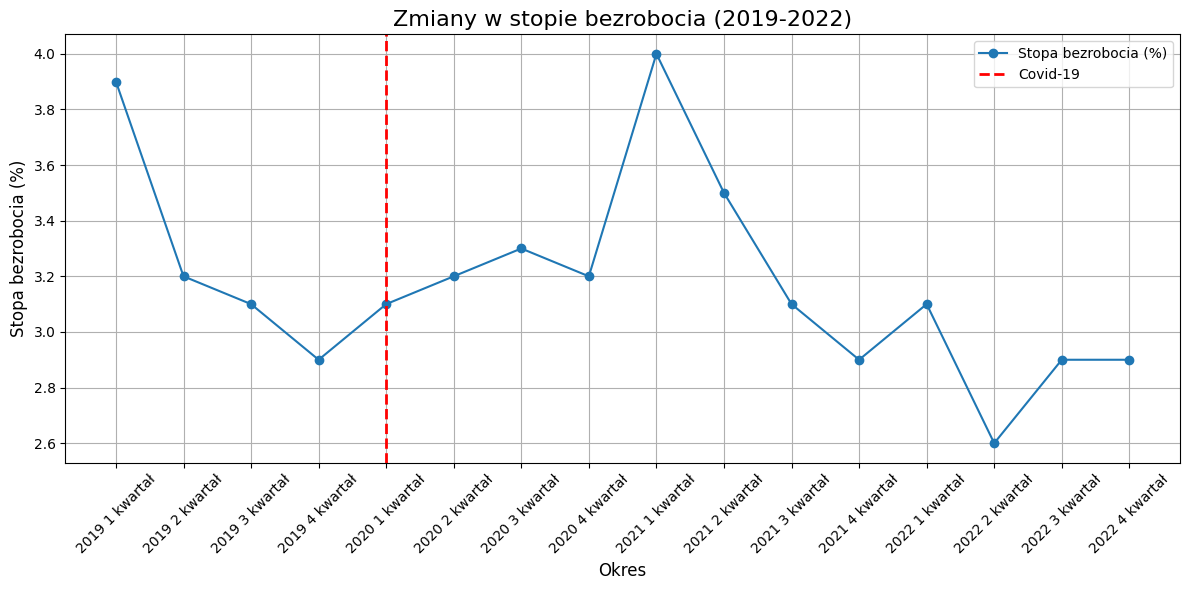

In [30]:
import matplotlib.pyplot as plt

# Tworzenie wykresu
plt.figure(figsize=(12, 6))

# Wykres liniowy z wartościami dla kwartałów
plt.plot(filtered_data["Okres"], filtered_data["Wartosc"], marker="o", label="Stopa bezrobocia (%)")
plt.axvline(x = "2020 1 kwartał", color="red", linestyle="--", linewidth=2, label="Covid-19")
# Dostosowanie osi X
plt.xticks(rotation=45)

# Dodanie tytułu i opisów osi
plt.title("Zmiany w stopie bezrobocia (2019-2022)", fontsize=16)
plt.xlabel("Okres", fontsize=12)
plt.ylabel("Stopa bezrobocia (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()


## Wzrost w Q1 2021

1. Trzecia fala pandemii COVID-19  
W Polsce na początku 2021 roku pojawiła się trzecia fala zakażeń COVID-19. Wprowadzono kolejne restrykcje, które szczególnie dotknęły:
Branżę gastronomiczną (zamknięcie restauracji i kawiarni).
Branżę hotelarską i turystyczną.
Handel (częściowe ograniczenie działalności galerii handlowych).
Firmy w tych sektorach, szczególnie małe i średnie przedsiębiorstwa, nie miały rezerw finansowych na przetrwanie kolejnych miesięcy obostrzeń, co doprowadziło do kolejnych zwolnień.  
2. Efekt sezonowy  
Zima zawsze wpływa na zwiększenie bezrobocia, szczególnie w Polsce:
Wiele miejsc pracy w takich sektorach jak budownictwo, rolnictwo czy turystyka jest zależnych od pogody.
W zimie aktywność w tych branżach maleje, co prowadzi do czasowych zwolnień pracowników.  
3. Wygaśnięcie niektórych programów wsparcia rządowego  
W 2020 roku wprowadzono szereg programów pomocowych (np. tarcze antykryzysowe), które pozwoliły przedsiębiorstwom utrzymać zatrudnienie.
W I kwartale 2021 roku niektóre programy zaczęły wygasać lub ich finansowanie było ograniczone. Przykłady:
Subwencje dla przedsiębiorców w ramach PFR (Polskiego Funduszu Rozwoju).
Dopłaty do wynagrodzeń pracowników w ramach Funduszu Gwarantowanych Świadczeń Pracowniczych.  
4. Niepewność pracodawców  
Na początku 2021 roku wiele firm nadal obawiało się niepewności co do dalszego rozwoju pandemii i możliwości wprowadzenia kolejnych lockdownów. W rezultacie część przedsiębiorstw podejmowała decyzje o redukcji zatrudnienia w ramach zabezpieczenia się przed kolejnymi kryzysami.  
5. Niskie ożywienie w niektórych sektorach  
W sektorach takich jak turystyka, kultura i rozrywka, gdzie działalność była ograniczona od 2020 roku, odbicie było bardzo powolne.
W efekcie pracownicy związani z tymi branżami mieli problem ze znalezieniem nowego zatrudnienia.  
6. Efekty strukturalne  
Pandemia spowodowała, że część firm przyspieszyła automatyzację i cyfryzację, co zredukowało zapotrzebowanie na niektóre grupy pracowników, szczególnie w mniej wykwalifikowanych zawodach.  